In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')
# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        55987 non-null    datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB
None


In [7]:
# Summary statistics for numerical columns
print(df.describe())

# Unique publishers and stocks
print("Unique publishers:", df['publisher'].nunique())
print("Unique stocks:", df['stock'].nunique())

         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06
Unique publishers: 1034
Unique stocks: 6204


Check the distribution of articles over time:

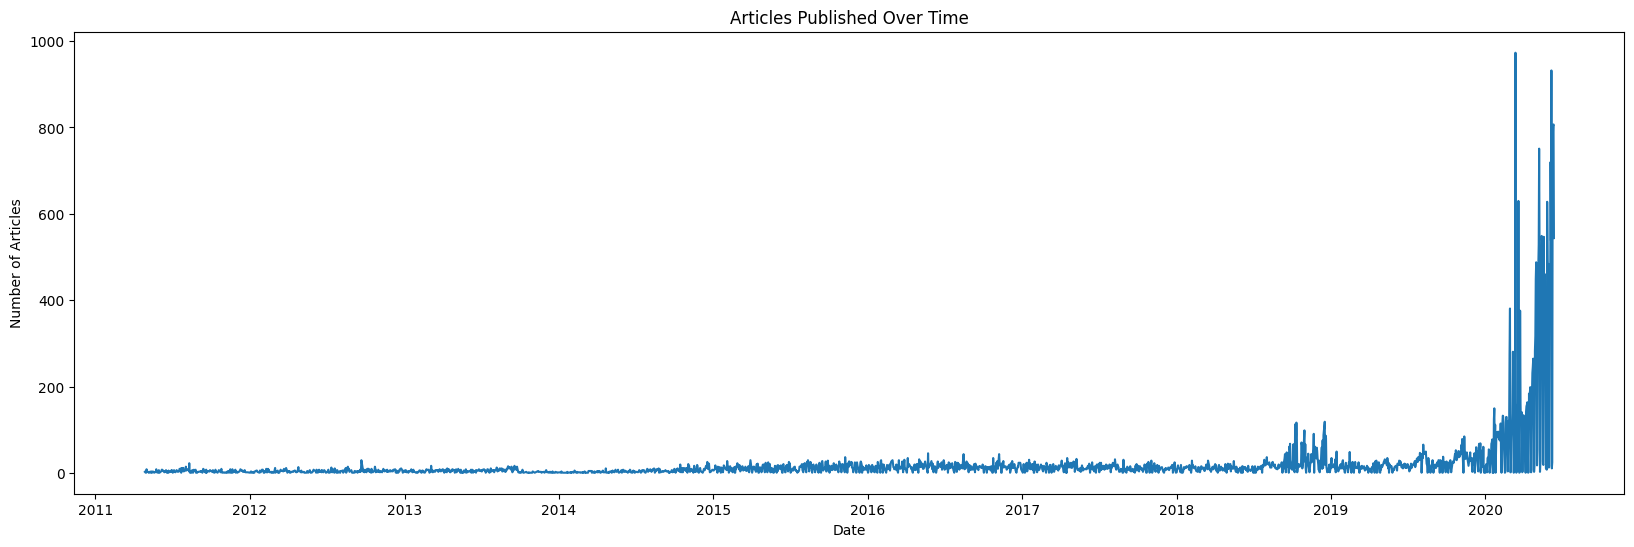

In [8]:
df['date_only'] = df['date'].dt.date  # Extract the date part
articles_per_day = df.groupby('date_only').size()

# Plot
plt.figure(figsize=(20, 6));
articles_per_day.plot(kind='line', title='Articles Published Over Time');
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

#### Publisher Analysis
##### Most frequent publishers:

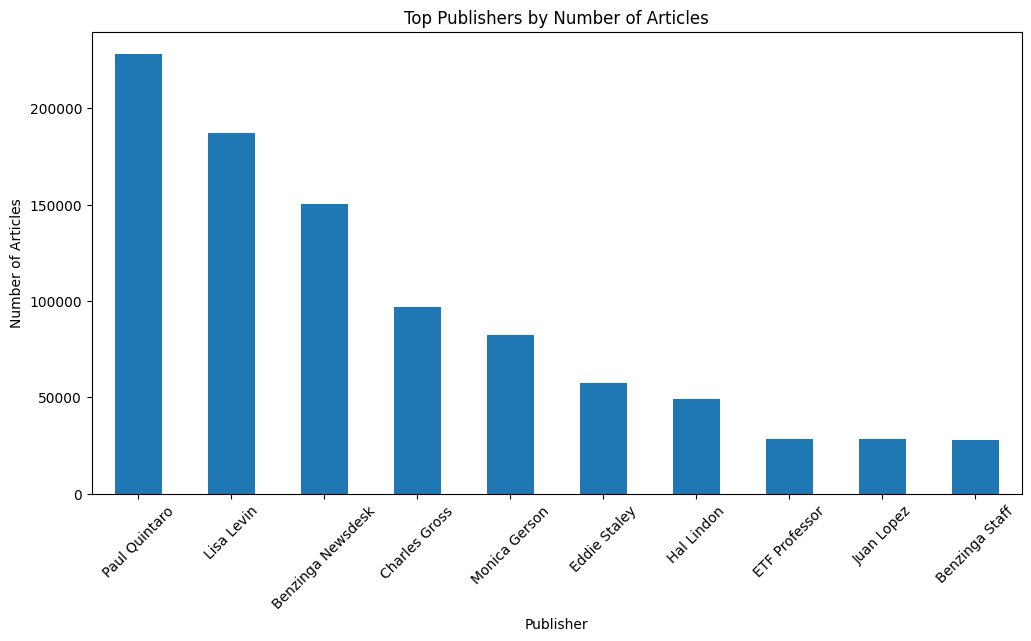

In [9]:
top_publishers = df['publisher'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', title='Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Calculate headline lengths:

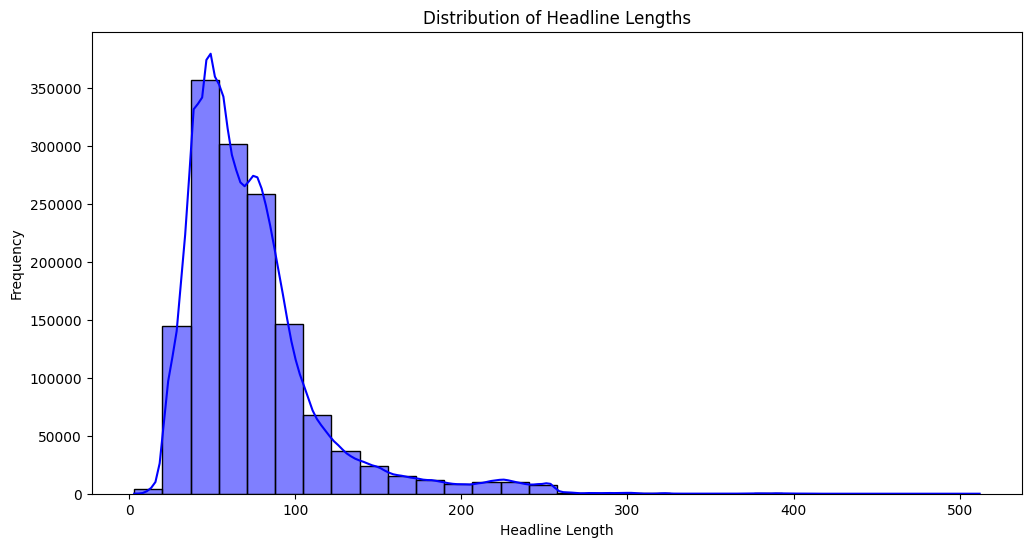

In [10]:
df['headline_length'] = df['headline'].apply(len)

# Plot headline length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Headline length statistics:")
print(df['headline_length'].describe())

Headline length statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [12]:
from textblob import TextBlob


In [ ]:

# Add a sentiment score column
df['sentiment_score'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='green')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()